In [1]:
import tensorflow as tf
import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import os
import numpy as np

In [2]:
man_dir1 = "data/Man_Woman/man"
man_dir2 = "data/Man_Woman2/Male"
woman_dir1 = "data/Man_Woman/woman"
woman_dir2 = "data/Man_Woman2/Female"

In [3]:
filename_man1 = [os.path.join(man_dir1, f)
                 for f in os.listdir(man_dir1) if f.endswith("jpg") or f.endswith("png")]
filename_man2 = [os.path.join(man_dir2, f)
                 for f in os.listdir(man_dir2) if f.endswith("jpg") or f.endswith("png")]
filename_woman1 = [os.path.join(woman_dir1, f)
                   for f in os.listdir(woman_dir1) if f.endswith("jpg") or f.endswith("png")]
filename_woman2 = [os.path.join(woman_dir2, f)
                   for f in os.listdir(woman_dir2) if f.endswith("jpg") or f.endswith("png")]

In [4]:
print(len(filename_man1)+len(filename_man2))

77949


In [5]:
filenames = filename_man1 + filename_man2 + filename_woman1 + filename_woman2
labels = [0]*len(filename_man1) + [0]*len(filename_man2) + [1]*len(filename_woman1) + [1]*len(filename_woman2)

In [6]:
def load_image(filename):
    image = tf.io.read_file(filename)
    image = tf.io.decode_image(image, channels=3)
    image = tf.image.rgb_to_grayscale(image)
    image = tf.image.resize(image, (150, 150))
    image = tf.cast(image, tf.float16)
    return image

In [7]:
length = int(len(filenames)/2)
filenames1 = filenames[0:length]
filenames2 = filenames[length:]

In [8]:
data11 = [load_image(i) for i in tqdm(filenames1)]
data22 = [load_image(i) for i in tqdm(filenames2)]
labels11 = labels[0:length]
labels22 = labels[length:]

100%|██████████| 91670/91670 [11:51<00:00, 128.87it/s]


In [9]:
print(data11[0].dtype)

<dtype: 'float16'>


In [10]:
data_copy11 = data11

In [11]:
print(data11[0].dtype)

<dtype: 'float16'>


In [12]:
data_copy22 = data22

In [13]:
idx = np.random.permutation(len(data11))
idx = idx.tolist()
data2 = []
labels2 = []
for i in range(len(data11)):
    data2.append(data11[idx[i]])
    labels2.append(labels11[idx[i]])
data11 = data2
labels11 = labels2


idx = np.random.permutation(len(data22))
idx = idx.tolist()
data2 = []
labels2 = []
for i in range(len(data22)):
    data2.append(data22[idx[i]])
    labels2.append(labels22[idx[i]])
data22 = data2
labels22 = labels2

In [14]:
length = int(len(data11)/4)
data1 = data11[0:length]
label1 = labels11[0:length]
data2 = data11[length:2*length]
label2 = labels11[length:2*length]
data3 = data11[2*length:3*length]
label3 = labels11[2*length:3*length]
data4 = data11[3*length:4*length]
label4 = labels11[3*length:4*length]

length = int(len(data22)/4)
data5 = data22[0:length]
label5 = labels22[0:length]
data6 = data22[length:2*length]
label6 = labels22[length:2*length]
data7 = data22[2*length:3*length]
label7 = labels22[2*length:3*length]
data8 = data22[3*length:4*length]
label8 = labels22[3*length:4*length]

In [15]:
weights_dict = {0:1.3, 1:1}

In [16]:
list_data = [data1, data2, data3, data4, data5, data6, data7, data8]

In [17]:
weight1 = np.array([weights_dict[y] for y in label1])
weight2 = np.array([weights_dict[y] for y in label2])
weight3 = np.array([weights_dict[y] for y in label3])
weight4 = np.array([weights_dict[y] for y in label4])
weight5 = np.array([weights_dict[y] for y in label5])
weight6 = np.array([weights_dict[y] for y in label6])
weight7 = np.array([weights_dict[y] for y in label7])
weight8 = np.array([weights_dict[y] for y in label8])

In [18]:
list_data1 = []
list_data2 = []
i = 0
for data in list_data:
    i = i+1
    scaler = MinMaxScaler()
    data = np.array(data)
    shape = data.shape
    print("1ere shape data{} : {}".format(i, shape), end="")
    data = data.reshape(-1, 2)
    data = scaler.fit_transform(data)
    data = data.reshape(shape)
    print("2e shape data{} : {}".format(i, data.shape), end="")
    if len(list_data1) < 4:
        list_data1.append(data)
    else:
        list_data2.append(data)
    

1ere shape data1 : (22917, 150, 150, 1)2e shape data1 : (22917, 150, 150, 1)1ere shape data2 : (22917, 150, 150, 1)2e shape data2 : (22917, 150, 150, 1)1ere shape data3 : (22917, 150, 150, 1)2e shape data3 : (22917, 150, 150, 1)1ere shape data4 : (22917, 150, 150, 1)2e shape data4 : (22917, 150, 150, 1)1ere shape data5 : (22917, 150, 150, 1)2e shape data5 : (22917, 150, 150, 1)1ere shape data6 : (22917, 150, 150, 1)2e shape data6 : (22917, 150, 150, 1)1ere shape data7 : (22917, 150, 150, 1)2e shape data7 : (22917, 150, 150, 1)1ere shape data8 : (22917, 150, 150, 1)2e shape data8 : (22917, 150, 150, 1)

In [19]:
label1 = np.array(label1)
label2 = np.array(label2)
label3 = np.array(label3)
label4 = np.array(label4)
label5 = np.array(label5)
label6 = np.array(label6)
label7 = np.array(label7)
label8 = np.array(label8)

In [20]:
list_data = list_data1 + list_data2
list_labels = [label1, label2, label3, label4, label5, label6, label7, label8]

In [21]:
print(list_data[0].shape)

(22917, 150, 150, 1)


In [22]:
# Convolutionnal layer 1
filter_size1 = 2
num_filter1 = 16

# Convolutionnal layer 2
filter_size2 = 2
num_filter2 = 16

#Convolutionnal layer 3
filter_size3 = 2
num_filter3 = 32

#Convolutionnal layer 4
filter_size4 = 2
num_filter4 = 32

filter_size5 = 2
num_filter5 = 32

filter_size6 = 2
num_filter6 = 64

filter_size7 = 2
num_filter7 = 64

filter_size8 = 2
num_filter8 = 64

filter_size9 = 2
num_filter9 = 64

filter_size10 = 2
num_filter10 = 64

filter_size11 = 2
num_filter11 = 64

In [23]:
class ResidualBlock(tf.keras.layers.Layer):
    def __init__(self, n_layers = 3, n_filters = 32, filter_size = 3, add_input = False, **kwargs):
        super().__init__(**kwargs)
        self.n_filters = n_filters
        self.filter_size = filter_size
        self.add_input = add_input
        self.inp = keras.layers.Conv2D(n_filters, (filter_size, filter_size), activation = "relu", padding = "same", input_shape = (150, 150, 1))
        self.hidden = [keras.layers.Conv2D(n_filters, (filter_size, filter_size), padding = "same", activation = "relu")
                       for _ in range(n_layers)
        ]
        self.input_conv = keras.layers.Conv2D(self.n_filters, (self.filter_size, self.filter_size), padding = "same",  activation = "relu")
    
    def call(self, inputs):
        Z = inputs
        if self.add_input:
            Z = self.inp(Z)
        for layer in self.hidden:
            Z = layer(Z)
        inputs = self.input_conv(inputs)
        return inputs + Z

In [24]:
class ManWomanModel(keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.residualBlock1 = ResidualBlock(n_filters=16, add_input=True)
        self.residualBlock2 = ResidualBlock(n_filters=32)
        self.residualBlock3 = ResidualBlock(n_filters=64)
        self.residualBlock4 = ResidualBlock(n_filters=64)
        self.flatten = keras.layers.Flatten()
        self.dense_layer1 = keras.layers.Dense(64, activation = "relu")
        self.dense_layer2 = keras.layers.Dense(64, activation = "relu")
        self.out = keras.layers.Dense(1, activation = "sigmoid")
        
    def call(self, inputs):
        a1 = self.residualBlock1(inputs)
        a2 = self.residualBlock2(a1)
        a3 = self.residualBlock3(a2)
        a4 = self.residualBlock4(a3)
        f = self.flatten(a4)
        a5 = self.dense_layer1(f)
        a6 = self.dense_layer2(a5)
        out = self.out(a6)
        return out
        


In [25]:
model = ManWomanModel()
model.compile(loss = keras.losses.binary_crossentropy,
              optimizer = keras.optimizers.Adam(),
              metrics = ["accuracy"],
              )

In [26]:
epoch = 1
batch_size = 32

In [27]:
print(data.shape)

(22917, 150, 150, 1)


In [ ]:
for k in range(20):
    for i in range(8):
        model.fit(list_data[i], list_labels[i],
            epochs = epoch,
            batch_size = batch_size,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience=3),
                            tf.keras.callbacks.ModelCheckpoint('man_woman3_essai.h5', save_best_only=True)],
            validation_split = 0.3,
            )

0


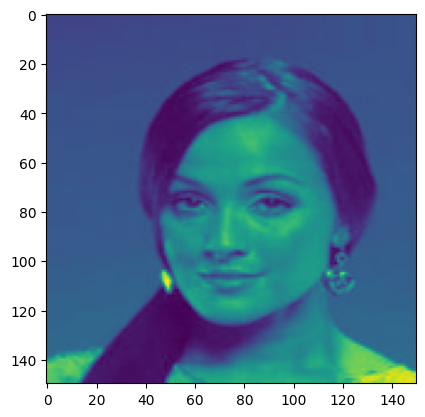

In [ ]:
i = 100
print(list_labels[1][i])
plt.imshow(list_data2[1][i])